# Missing Values

Another aspect of data that often requires preprocessing is missing data. Missing data is that that was not measured or recorded for some reason.
Sometimes, data is missing at random, for reasons unrelated to the task at hand. Other times (and more commonly) data is missing because of some structural aspect of the problem.
 todo reluctant users example

## Detecting Missing Values

The first question you should ask yourself is 'do I have missing data'? Often, but not always, pandas might have been able to detect missing values when reading the data.
Let's look at the lending club data again:

In [2]:
import pandas as pd
loans = pd.read_csv("C:/Users/t3kci/Downloads/loan.csv/loan.csv", nrows=10000)
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


You can see that many of the values are shown as NaN, which is how missing values are usually displayed in pandas. We can also check whether a column has NaN values by using the ``isna`` method:

In [3]:
# are any NaNs in the loan amount column?
loans.loan_amnt.isna().any()

False

In [4]:
# are any NaNs in the int_rate column?
loans.int_rate.isna().any()

False

We can see that both the ``loan_amnt`` and ``int_rate`` column are always present. We can also check the same for all columns at once:

In [5]:
loans.isna().any().head(20)

id                      True
member_id               True
loan_amnt              False
funded_amnt            False
funded_amnt_inv        False
term                   False
int_rate               False
installment            False
grade                  False
sub_grade              False
emp_title               True
emp_length              True
home_ownership         False
annual_inc             False
verification_status    False
issue_d                False
loan_status            False
pymnt_plan             False
url                     True
desc                    True
dtype: bool

You can see that for example ``emp_title`` and ``emp_length`` and ``url`` are sometimes missing. Now, the next question is whether we can find out what this means. Does that mean the borrower was not employed? Or does that mean that the borrower didn't provide any information? Often the easiest way to find this out is to look at the data description or data dictionaty. We might also check if there is another value that indicates 'not employed' .

Unfortunately, missing values are not always encoded as clearly. Sometimes they might be encoded as ``'?'`` or ``'missing'`` or ``"Na"`` or similar strings. Sometimes they might also be encoded as numbers such as -1.
Often you can tell whether one of these methods was used by the dtype of your columns. For example, in the often-used titanic dataset, missingness is encoded as ``'?'``.


In [6]:
titanic = pd.read_csv("../data/titanic.csv")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


If you looked as ``isna`` it would look like none of the values is missing:

In [7]:
titanic.isna().any()

pclass       False
survived     False
name         False
sex          False
age          False
sibsp        False
parch        False
ticket       False
fare         False
cabin        False
embarked     False
boat         False
body         False
home.dest    False
dtype: bool

However, we can clearly see the ``"?"`` in the listing above. Also, if you Look at the numeric columns, you'll notice that some are encoded as object, which is a good give-away:

In [8]:
titanic.dtypes

pclass        int64
survived      int64
name         object
sex          object
age          object
sibsp         int64
parch         int64
ticket       object
fare         object
cabin        object
embarked     object
boat         object
body         object
home.dest    object
dtype: object

For example we might expect `'age'` to be an integer or floating point number, but it is an object. We can confirm the presence of a missing value encoded as `'?'` by calling ``value_counts`` (though we might have already figured that out by looking at the other columns with question marks in them):

In [9]:
titanic.age.value_counts()

?         263
24         47
22         43
21         41
30         40
         ... 
0.1667      1
26.5        1
60.5        1
38.5        1
22.5        1
Name: age, Length: 99, dtype: int64

In this relatively simple case, we can just fix this by passing ``na_values`` when calling ``read_csv``:

In [10]:
titanic = pd.read_csv("../data/titanic.csv", na_values="?")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [11]:
titanic.isna().any()

pclass       False
survived     False
name         False
sex          False
age           True
sibsp        False
parch        False
ticket       False
fare          True
cabin         True
embarked      True
boat          True
body          True
home.dest     True
dtype: bool

One of the more "interesting" cases that I have seen is as part of a census dataset made available by the City of New York (todo https://docs.google.com/document/d/1EHyWR-GZfwK5a9JJc_nFy3yvVofA11cMjvH7vXE6JH0/edit and https://ndownloader.figshare.com/files/7586326)

In [12]:
data = pd.read_csv("https://ndownloader.figshare.com/files/7586326")

In [13]:
data.head()

,recid,boro,uf1_1,uf1_2,uf1_3,uf1_4,uf1_5,uf1_6,uf1_7,uf1_8,...,hflag4,hflag18,uf52h_h,uf52h_a,uf52h_b,uf52h_c,uf52h_d,uf52h_e,uf52h_f,uf52h_g
0,1,1,9,9,9,9,1,9,9,9,...,0,0,0,0,0,0,0,0,0,0
1,1,1,9,9,9,9,1,9,9,9,...,0,0,1,1,1,0,0,0,0,0
2,1,1,9,9,9,9,1,9,9,9,...,0,0,1,1,1,0,1,0,1,0
3,1,1,9,9,9,9,1,9,9,9,...,0,0,0,0,0,0,0,0,0,0
4,1,1,9,9,9,9,1,9,9,9,...,0,0,1,0,0,0,1,0,0,0


In this dataset, a missing value is indicated by the digit ``9``. However, the number of digits is dependent on the maximum value in that column. For example the column ``sc134`` is a year (like 2001), and so missingness is encoded as 9999, while in column 'uf5', missingness is indicated by ``9999999``. Such cases are much more tricky to find and process correctly.

## Missing categorical vs missing continuous data
For categorical features, in many cases, whether data is missing randomly or not, we can treat missing data as just another category, which we can call 'missing' or 'unknown' or something like that (assuming these values don't already appear).
If we correctly encoded the missing values with pandas, we can replace them all with ``fillna``:

In [14]:
# we can replace the missing values inplace, i.e. change the existing column
# we could also create a new column and then drop or disregard the old one
loans.emp_title.fillna('missing', inplace=True)
loans.emp_title.isna().any()

False

Dealing with missing values in continuous data is more tricky, and will be the topic of the reset of this section.
There are three basic options:
- Removing missing data
- Filling in missing data with a placeholder or a semantically meaningful value
- Filling in the missing data with best-guess values (imputation)

```{margin}
There is no clear rule when to drop a column because it has too many missing values. Anything with more than 50% missing might be a candidate, but then again, if the remaining values are very informative, you should keep them.
As with many choices in machine learning, the best way is to try and evaluate the different possibilities.
```

```{sidebar}
![:scale 80%](images/row_nan_col_nan.png)
```

The simplest method if obviously just dropping the data; you can either drop rows containing missing values or columns containing missing values.
When dropping columns, the main issue is that you might lose an informative feature. If a column is only missing sometimes, or even missing 50% of the time, you might discard critical information.

When dropping rows, you might not only lose valuable training data, you might also run into another issue. If missing values appear in a model you deployed, usually you don't have the choice of dropping the sample, you are forced to make a prediction. If you don't have a way to deal with missing values, this might be a problem.

Sometimes, if the data is missing for structural reasons, it might be possible to fill in a semantically meaningful value. For example, the 'ames housing' dataset for house price prediction has missing values for the square footage of the basement if the house has no basement. A reasonable value here might be 0, as there is no basement. Still, there might be value in knowing that there is no basement, and this might be good to represent explicitly.
A common practice is to add a new feature that indicates whether a value was missing or not before filling it in.

If there is no reasonable value to fill in, the last choice is to fill in the value with a best-guess estimate of what the value might have been if we observed it. This is known as imputation, and, as mentioned above, usually only applied to continuous features, while for categorical features a new category is created.

## Imputation methods

```{sidebar}
![:scale 100%](images/imputation-schema.png)
```

Imputation means filling in missing values, and there is a wide variety of methods. Usually, these are unsupervised, so they only make use of the information of features on the training data.
The simplest strategy is to fill in a feature with the mean or median of that features over the non-missing samples.
That is implemented in the ``SimpleImputer`` in scikit-learn.
To illustrate, we will look at the iris dataset, where we artificially introduced some missing values. The iris dataset is a relatively simple three-class classification dataset with four features (todo really iris? not breast cancer?):

In [15]:
from sklearn.datasets import load_iris
# we pass as_frame to get a pandas dataframe,
# passing return_X_y means we get features and targets already separated
X, y = load_iris(as_frame=True, return_X_y=True)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


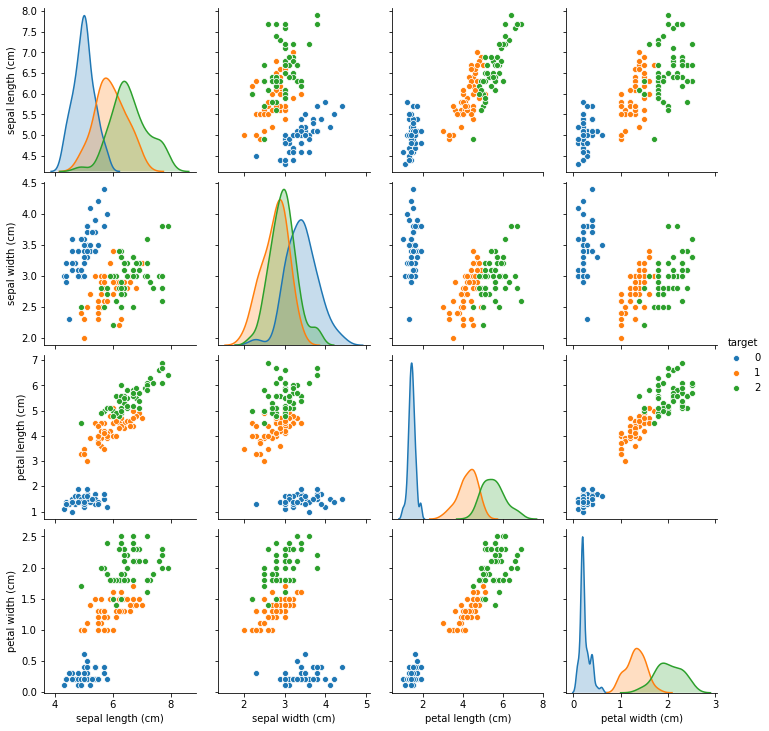

In [16]:
import seaborn as sns
df = X.copy()
df['target'] = y
sns.pairplot(df, hue='target')

To get a baseline, let's apply ``KNeighborsClassifier`` to the full original data (after scaling, of course):

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

# make a pipeline containing standard scaling and knn classification
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
# fit the pipeline on the training set
pipe.fit(X_train, y_train)
# compute accuracy on the test set
pipe.score(X_test, y_test)

0.9736842105263158

The dataset is quite small, and depending on how you split the data (i.e. how you pick the random_state), the results can vary quite a bit. But usually they are in the high nineties.

In [19]:
import numpy as np
rng = np.random.RandomState(42)
# we introduce some missing values
# we make the likelihood that a value is missing dependent on the feature values, i.e. they are not missing at random
X_missing = X.copy()
# create missingness mask of same size as X
# 8 seems good
mask = rng.binomial(n=np.array([1, 1, 1, 1]).reshape(1, -1),
                    p=(X['petal length (cm)'] / 8).values.reshape(-1, 1)).astype(np.bool)
X_missing[mask] = np.NaN

In [20]:
X_missing

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,NaN,1.4,0.2
1,4.9,3.0,1.4,NaN
2,4.7,3.2,1.3,NaN
3,NaN,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,NaN,3.0,NaN,NaN
146,6.3,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN
148,NaN,NaN,5.4,NaN


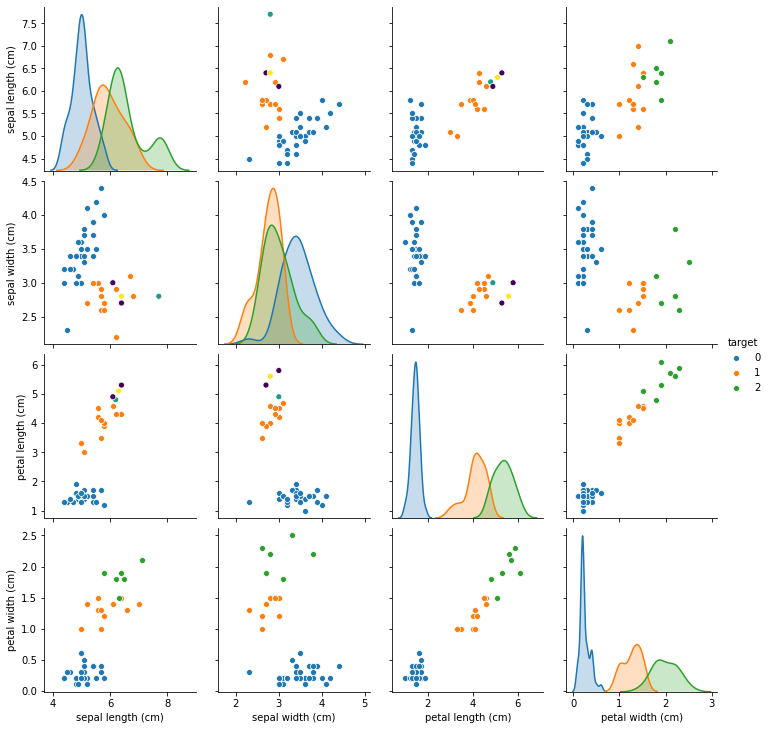

In [21]:
import seaborn as sns
df_missing = X_missing.copy()
df_missing['target'] = y
sns.pairplot(df_missing, hue='target')

You can see that now different panels in the pairplot show different amounts of data, as some of the features are sometimes missing. We mostly removed samples from the green and orange classes.
In this synthetic example, the missingness is highly informative, maybe more so than common in practice, and the dataset is terribly easy. Keep that in mind when going over this example.

We could drop all samples with missing values, though this is likely to give us bad results. Also, the evaluation would be harder as the data wouldn't be balanced any more, and the blue class would dominate.

## SimpleImputer

So let's start by imputing the data using median imputation:

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
# split data into training and test set.
# we only ever want to fit on the training part!
X_train, X_test, y_train, y_test = train_test_split(X_missing, y, random_state=13)
# instantiate simple imputer with median imputation
si = SimpleImputer(strategy='median')
# impute training data
X_train_median = si.fit_transform(X_train)

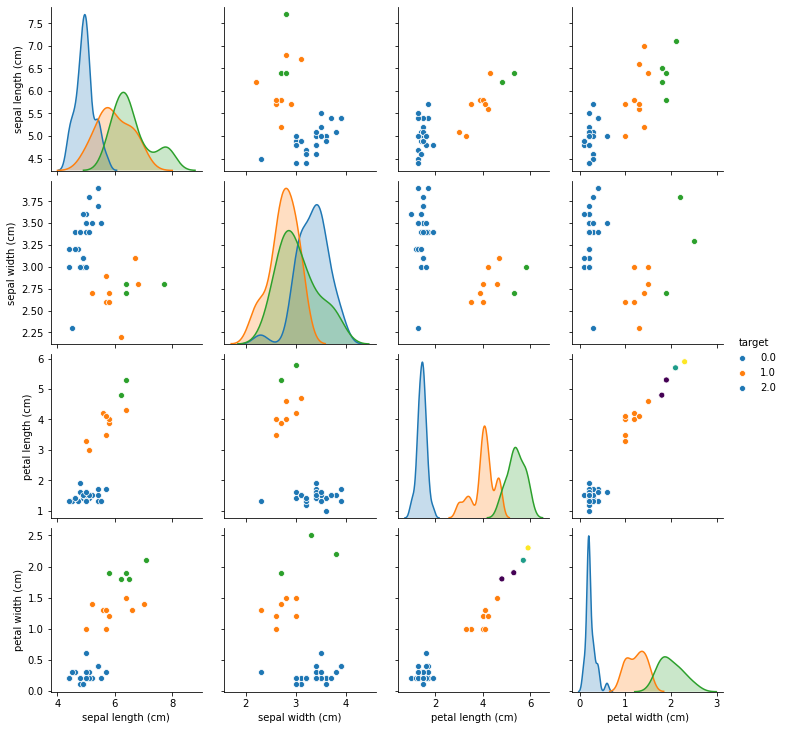

In [25]:
import seaborn as sns
df_missing_train = X_missing.copy()
df_missing_train['target'] = y_train
sns.pairplot(df_missing_train, hue='target')

C:\Users\t3kci\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


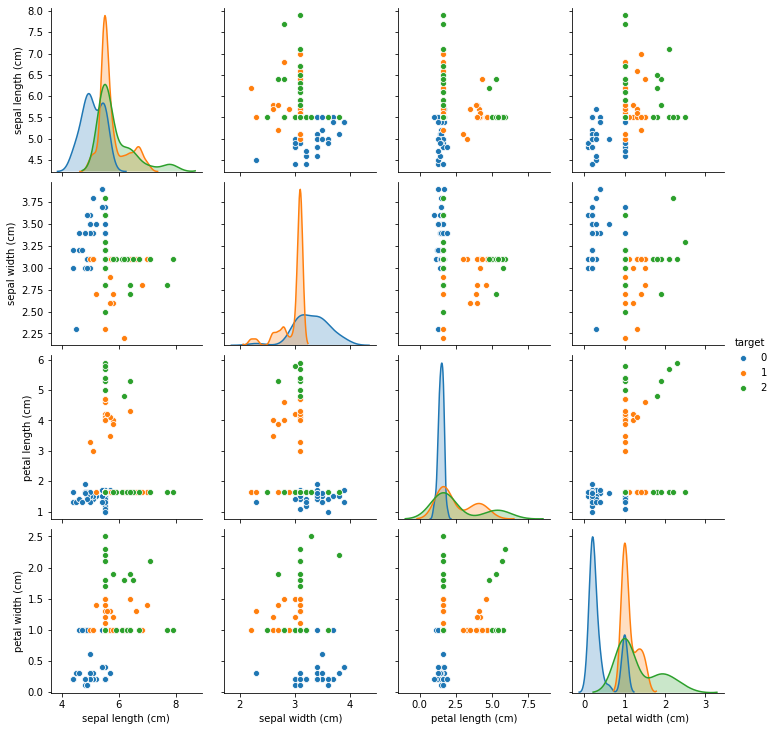

In [26]:
# create a new dataframe for plotting with seaborn
# If we don't add the index, the alignment with y_train will be off
# we could also strip the index of y_train instead, but they need to match.
df_median = pd.DataFrame(X_train_median, columns=X_train.columns, index=X_train.index)
df_median['target'] = y_train
sns.pairplot(df_median, hue='target')

You can see that much of the data has been moved towards the center, and the distributions are much harder to distinguish.
That's to be expected as there are now many identical values. In the case of higher dimensional data or fewer missing values, this stragegy actually performs reasonably well, but here it doesn't seem very good.
```{margin}
Most of the methods in scikit-learn can not deal with missing values. However, most of the preprocessing methods such as scaling can!
Therefore we can scale the data before imputation.
```

Let's see how good or bad this will do with the ``KNeighborsClassifier``. We can put the imputation directly in the pipeline to save us some work:

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipe_median = make_pipeline(StandardScaler(),
                            SimpleImputer(strategy='median'),
                            KNeighborsClassifier())
pipe_median.fit(X_train, y_train)
pipe_median.score(X_test, y_test)

0.8421052631578947

The result is quite a bit worse than on the full dataset (as can be expected), but still much better than chance (which would be 33%).
Instead of just filling in the median, we can also add an indicator 

In [28]:
pipe_median_ind = make_pipeline(StandardScaler(),
                                SimpleImputer(strategy='median', add_indicator=True),
                                KNeighborsClassifier())
pipe_median_ind.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('simpleimputer',
                 SimpleImputer(add_indicator=True, strategy='median')),
                ('kneighborsclassifier', KNeighborsClassifier())])

Before we evaluate the model, it's a good idea to have a look at the data as it enters the model. We can do this by slicing the pipeline and taking all but the last step:

In [29]:
np.set_printoptions(precision=3)
pipe_median_ind[:-1].transform(X_train)[::3]

array([[ 0.716, -2.373, -0.695,  0.157,  0.   ,  0.   ,  1.   ,  1.   ],
       [ 0.593, -0.119, -0.695,  0.157,  0.   ,  1.   ,  1.   ,  1.   ],
       [-0.147,  0.132, -0.695,  0.157,  1.   ,  0.   ,  1.   ,  1.   ],
       [-0.764, -0.119,  0.321,  0.157,  0.   ,  1.   ,  0.   ,  0.   ],
       [ 0.099, -0.119, -0.665, -0.83 ,  0.   ,  1.   ,  0.   ,  0.   ],
       [-0.147, -0.119,  1.923,  1.991,  1.   ,  1.   ,  0.   ,  0.   ],
       [-0.147,  0.132, -0.695, -0.971,  1.   ,  0.   ,  1.   ,  0.   ],
       [-0.147,  0.382, -0.695,  2.274,  1.   ,  0.   ,  1.   ,  0.   ],
       [ 0.839, -0.119, -0.695,  0.157,  0.   ,  1.   ,  1.   ,  1.   ],
       [ 1.086, -0.119, -0.695,  1.286,  0.   ,  1.   ,  1.   ,  0.   ],
       [-0.147, -0.119, -0.695,  0.157,  1.   ,  1.   ,  1.   ,  0.   ],
       [-0.147,  0.632, -0.665, -0.971,  1.   ,  0.   ,  0.   ,  0.   ],
       [-0.147, -0.119, -0.695,  0.157,  1.   ,  1.   ,  1.   ,  0.   ],
       [-0.147, -0.119, -0.695,  0.157,  1.   ,  1.

You can see that now instead of four features, we have eight features: each of the features is sometimes missing, and so for each of the features an indicator of missiness was added.
Now let's see if this helped:

In [30]:
pipe_median_ind.score(X_test, y_test)

0.8421052631578947

TODO actually got better?
Maybe somewhat surprisingly, the result got quite a bit worse. That might be because we added several redundant features, but it's hard to say what caused it.

## Neighbors based imputation
In practice, using SimpleImputer might often be enough, at least as a first try. But there are several more advanced methods that might also be relevant.
One of the most classical ones is based on nearest neighbors and implemented in the ``KNNImputer``. The ``KNNImputer`` imputes each missing value using a combination of it's k nearest neighbors.
TODO Figure
This seems relatively straight-forward, apart from one issue: how do you compute distances in the presence of missing values? Let's look at a toy example:

In [31]:
np.array([[1,           1,      1],
          [np.NaN,      0, np.NaN],
          [1,      np.NaN, np.NaN],
          [0,           2,       1]
         ])

array([[ 1.,  1.,  1.],
       [nan,  0., nan],
       [ 1., nan, nan],
       [ 0.,  2.,  1.]])

Here, we have 4 rows, with different features missing for each. We can clearly not use normal euclidean distances here.
If we want to compute the distance between the first row ``X[0]`` and the second row ``X[1]``, we can only use the second feature, while if we want to compute the distance between the first and the third row, we can only use the first.
A first idea could be to just use the distance on the features that two rows have in common, so the squared distance between ``X[0]`` and ``X[1]`` would be 1, the distance between ``X[0]`` and ``X[2]`` woudl be 0, and the distance between ``X[0]`` and ``X[3]`` would be 2.
However, that might be considered strange, as ``X[0]`` and ``X[3]`` are quite similar. Because neigher has missing values, there are more feature over which the distance is added up, though, leading to a larger overall distance.
To make up for this, the distances are multiplied by the number of features divided by the number of features two samples have in common. So the distance between ``X[0]`` and ``X[1]`` would be multiplied by ``3`` as there's 3 features in total and they only have one in common, while the distance between ``X[0]`` and ``X[3]`` would be multiplied by 1, as they have all features in common. Using this adjustment, ``X[3]`` is actually the row most simliar to ``X[0]``.

This adjusted distance is the measure used to compute neighbors in KNNImputer. Let's see the result of that on our modified iris dataset:

In [32]:
from sklearn.impute import KNNImputer
# the default of 3 and 5 neighbors give similar results
# given the small size of the dataset we pick 3
knni = KNNImputer(n_neighbors=3) 
X_train_knn = knni.fit_transform(X_train)

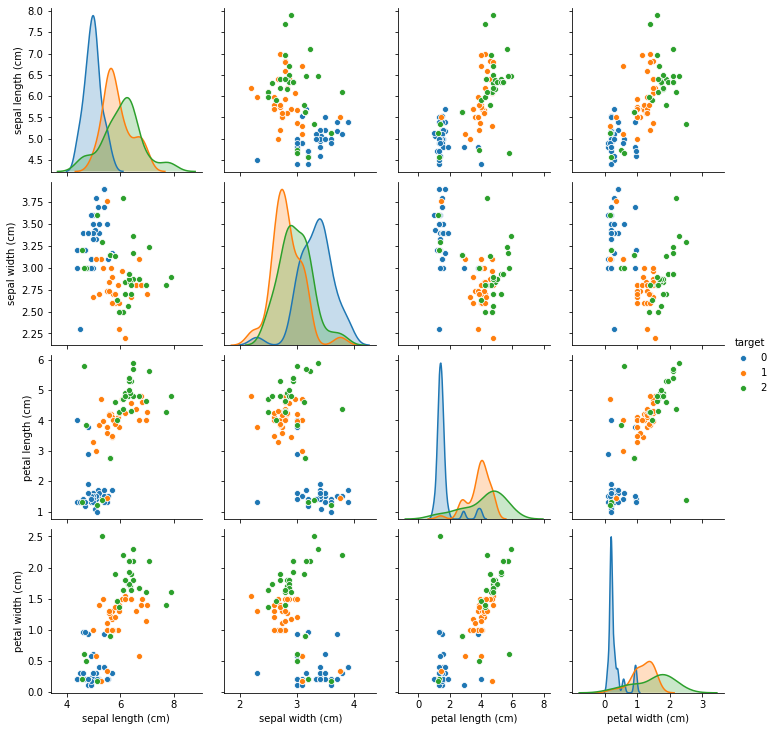

In [33]:
df_knn = pd.DataFrame(X_train_knn, columns=X_train.columns, index=X_train.index)
df_knn['target'] = y
sns.pairplot(df_knn, hue='target')

We can see that compared to figure TODO, imputation with KNNImputer preserves the data distribution much more closely than imputing just with the median.
Now let's see how it changes classification results:

In [34]:
pipe_knn = make_pipeline(StandardScaler(),
                            KNNImputer(n_neighbors=3),
                            KNeighborsClassifier())
pipe_knn.fit(X_train, y_train)
pipe_knn.score(X_test, y_test)

0.868421052631579

The results ar somewhat better, and we might trust this model a bit more as it preserves more of the original data distribution. However, there is an additional hyper-parameter, the number of neighbors to use for imputation (in addition to selecting the number of neighbors for classification).
We selected ``n_neighbors=3`` for imputation, though the default of 5 also works well. As mentioned before, we'll discuss selection of hyper-parameters in more detail in section TODO.
One of the main disadvantages of the KNNImputer, apart from the additional hyper-parameter, is the runtime complexity. To impute a new sample, we need to compute the distance to all samples in the training set. That can be quite expensive or even infeasible for large datasets, similar to the use of KNeighborsClassifier.

## Iterative Imputation
The final method of imputation that we'll discuss is iterative imputation based on a regression model.
We haven't really talked about regression models much, but for this part it's fine to treat them as a black box.
The idea of iterative imputation is to iterate over columns, and create a new modeling task: predict this column given all the other columns.
As we're only interested in imputing continuous variables, this is a standard regression task. So we can use any regression model to solve the task.
Then, we can use the predictions of the regressor to fill in the missing values, as illustrated in figure TODO.

To start the process, we ususally use a simple imputation model such as iterative imputer to ensure we have some candidate value for all features available.
For training the regression model, we only use the rows where the current target column is observed, so not missing, and we only fill in those rows that are missing.
This procedure is iterative, because once we filled in the first column, we will use the values we filled in the first column to train the model for the second column, and so on.
As a matter of fact, usually multiple passes over the dataset are used: once we filled in all the columns, their values changed, and so if we train a model for the first column
again, the predictions will be different, as the features for training the model have been changed by our other imputations.

This scheme is implemented in scikit-learn in ``IterativeImputer``. This model is still experimental, as some of its features might change.
To use any experimental feature, we have to make an import to enable it, before we can import the ``IterativeImputer`` itself. TODO maybe into margin or note?

In [35]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

A very common regression model for imputation is the Random Forest. We will talk about this model more in chapter TODO. For now, think of it just as a very flexible and powerful regression model.
The ``IterativeImputer`` is a meta-estimator, as it constructs an imputation method for any given regression model.
An important feature is the number of iterations, meaning the number of passes over the columns; after some experimentation, increasing it to 20 seems beneficial here.

In [55]:
from sklearn.ensemble import RandomForestRegressor
rf_imp = IterativeImputer(estimator=RandomForestRegressor(random_state=0), max_iter=20)
X_train_rf = rf_imp.fit_transform(X_train)

C:\Users\t3kci\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


We can see a convergence warning here: This is the main reason why ``IterativeImputer`` is still experimental in scikit-learn, it's hard to establish convergence criteria that work for a variety of regression model. The current criterion works well for linear models, but not for Random Forest, and you will always get a ConvergenceWarning for Random Forests for now, which you can ignore. You can see the details in the orginal paper on random forest based imputation TODO missforest.

Let's have another look at the pairplot over the data, this time imputed with ``IterativeImputer``.

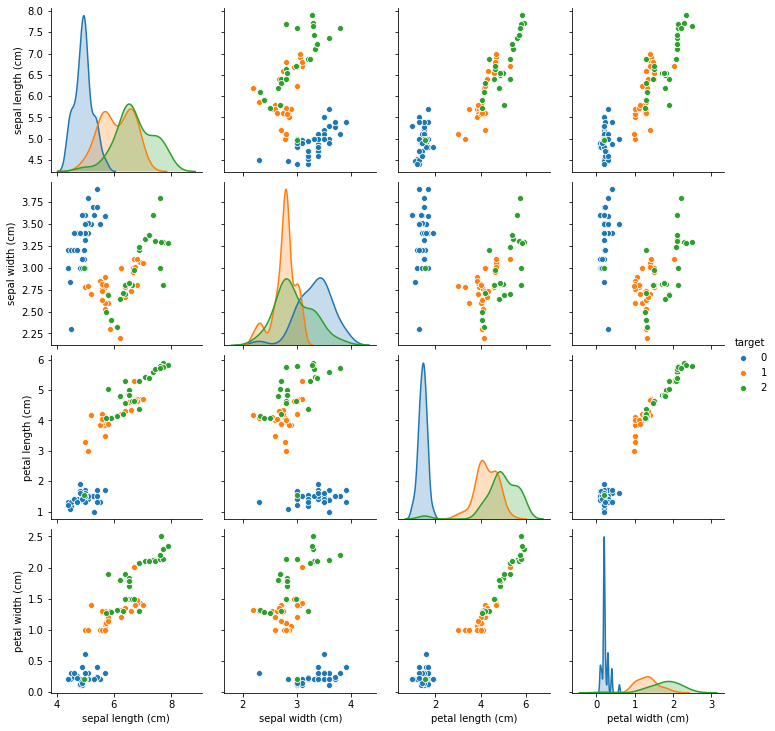

In [56]:
df_rf = pd.DataFrame(X_train_rf, columns=X_train.columns, index=X_train.index)
df_rf['target'] = y
sns.pairplot(df_rf, hue='target')

This imputation seems to preserve the data even better than the ``KNNImputer``, though there are still some points that seem to be moved to the wrong region of the input space.
Let's look at the original data and the different imputed versions next to each other for the petal length and petal width features, which are the most informative ones:

Text(0.5, 1.0, 'Iterative Imputation')

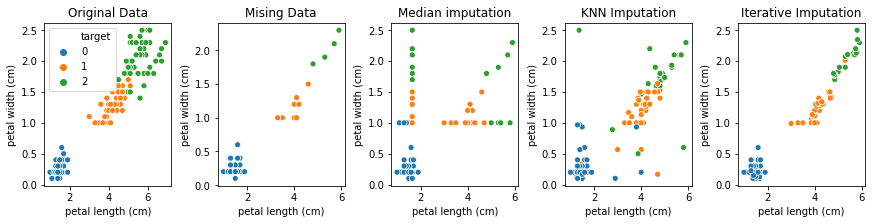

In [57]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(12, 3), constrained_layout=True)
for frame, ax in zip([df, df_missing_train, df_median, df_knn, df_rf], axes):
    # plot petal lenght vs petal width colored by target
    sns.scatterplot('petal length (cm)', 'petal width (cm)', data=frame, hue='target',
                    # plot within the pre-specified grid
                    ax=ax, palette='tab10',
                    # only add a legend to the first plot
                    legend='brief' if ax is axes[0] else False)
axes[0].set_title("Original Data")
axes[1].set_title("Mising Data")
axes[2].set_title("Median imputation")
axes[3].set_title("KNN Imputation")
axes[4].set_title("Iterative Imputation")

It seams each more advanced imputation method improves over the previous one, though the data in the last plot seems too tightly clustered. However given how much of the data we set to missing, that's likely unavoidable.
Finally, let's look at the scores of the iterative imputation:

In [58]:
pipe_rf = make_pipeline(rf_imp, StandardScaler(), KNeighborsClassifier())
pipe_rf.fit(X_train, y_train)
pipe_rf.score(X_test, y_test)

C:\Users\t3kci\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


0.8947368421052632

In this case, the IterativeImputer with the RandomForestRegressor provides the best results.

The ``IterativeImputer`` also allows adding an indicator feature for whether a row was imputed. Again, it doesn't seem to be beneficial on this dataset:

In [60]:
rf_imp_ind = IterativeImputer(estimator=RandomForestRegressor(random_state=0),
                              max_iter=20, add_indicator=True)
pipe_rf_ind = make_pipeline(rf_imp_ind, StandardScaler(), KNeighborsClassifier())
pipe_rf_ind.fit(X_train, y_train)
pipe_rf_ind.score(X_test, y_test)

C:\Users\t3kci\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


0.8421052631578947

All of the above results are meant as illustrative examples, and they are not very stable with respect to the original splitting of the data (feel free to change the random state from 13 to another value and see how it plays out), and to the random state in the RandomForestRegressor. However, this synthetic example provides a case study for when more involved imputation methods might be beneficial. The computational cost of using ``IterativeImputer`` depends a lot on the regression algorithm used, and for this modified version of iris, the IterativeImputer actually takes the longest of all the methods we looked at. If the dataset was much bigger, though, ``KNNImputer`` is likely to take a longer time to perform the imputation (though the training time for ``KNNImputer`` is of course smaller, since it only memorizes the data).

## Multiple imputation

There is a final approach which we'll only discuss briefly: *multiple imputation*. Filling in any missing value means making (more or less educated) guesses about what observed values are likely. In particular in a more inference motivated setting, this can lead to underestimating the uncertainty in the data. To compensate for that, it's possible to compute multiple new versions of the dataset, each with a slightly different imputation of the missing values. We can then build a model on each of these versions of the data, and aggregate the results. This can increase robustness of your model and of any inference. In cases that are more focused on prediction, as we are in this book, this seems to be rarely useful, though, and we'll not investigate it further.

## Summary
In this section we've seen how to deal with missing values in our data, both during training and prediction time. For categorical features, often adding 'missing' as another category is sufficient, while for continuous features, we usually need to rely on imputation, i.e. filling in the values. When doing imputation, it might still be useful to record whether a feature was imputed or not, using a binary indicator, since the fact that a feature was not observed might be informative.
For imputing values, often a simple approach such as using the mean or median is enough, and should be your baseline. If you want to use a more complex approach, the main contenders are ``KNNImputer``, which works reasonably well without much tuning on smaller datasets, and ``IterativeImputer``, which is quite flexible, but requires specifying a base model (often ``RandomForestRegressor``) as well as potentially the number of iterations.

As usual, there is no ultimate right answer, and apart from visualizations, as we did above, evaluating the final supervised learning method is the best way to access which method is best suited for your problem.
If your supervised learning model is flexible enough, and you have enough data, often a simple imputation scheme is enough, as the supervised model can often infer all the necessary information from the data.